In [1]:
import pandas as pd

# Data Cleaning

Read in all of the data files, and merge them into a single dataframe.

In [ ]:
raw_df_list = [pd.read_csv("On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2021_" + str(i) + ".csv") for i in range(8, 13)]
raw_df_list.extend([pd.read_csv("On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_" + str(i) + ".csv") for i in range(1, 8)])

In [ ]:
raw_df = pd.concat(raw_df_list)
raw_df

Only keep the flights where the marketing airline is the same as the operating airline.

In [ ]:
raw_df = raw_df[raw_df["Flight_Number_Marketing_Airline"] == raw_df["Flight_Number_Operating_Airline"]]

Remove unnecessary columns.

In [ ]:
raw_df.drop(columns=["Operated_or_Branded_Code_Share_Partners", "DOT_ID_Marketing_Airline", "IATA_Code_Marketing_Airline", "Flight_Number_Operating_Airline", "Originally_Scheduled_Code_Share_Airline", "DOT_ID_Originally_Scheduled_Code_Share_Airline", "IATA_Code_Originally_Scheduled_Code_Share_Airline", "Flight_Num_Originally_Scheduled_Code_Share_Airline", "Operating_Airline ", "DOT_ID_Operating_Airline", "IATA_Code_Operating_Airline", "OriginAirportSeqID", "OriginCityMarketID", "OriginStateFips", "OriginStateName", "OriginWac", "DestAirportSeqID", "DestCityMarketID", "DestStateFips", "DestStateName", "DestWac", "DepDelayMinutes", "ArrDelayMinutes", "CancellationCode", "AirTime", "Flights", "FirstDepTime", "TotalAddGTime", "LongestAddGTime", "DivAirportLandings", "DivReachedDest", "DivActualElapsedTime", "DivArrDelay", "DivDistance", "Div1Airport", "Div1AirportID", "Div1AirportSeqID", "Div1WheelsOn", "Div1TotalGTime", "Div1LongestGTime", "Div1WheelsOff", "Div1TailNum", "Div2Airport", "Div2AirportID", "Div2AirportSeqID", "Div2WheelsOn", "Div2TotalGTime", "Div2LongestGTime", "Div2WheelsOff", "Div2TailNum", "Div3Airport", "Div3AirportID", "Div3AirportSeqID", "Div3WheelsOn", "Div3TotalGTime", "Div3LongestGTime", "Div3WheelsOff", "Div3TailNum", "Div4Airport", "Div4AirportID", "Div4AirportSeqID", "Div4WheelsOn", "Div4TotalGTime", "Div4LongestGTime", "Div4WheelsOff", "Div4TailNum", "Div5Airport", "Div5AirportID", "Div5AirportSeqID", "Div5WheelsOn", "Div5TotalGTime", "Div5LongestGTime", "Div5WheelsOff", "Div5TailNum", "Duplicate", "Unnamed: 119", "Tail_Number"], inplace=True)

raw_df.rename(columns={"Flight_Number_Marketing_Airline": "Flight_Number"}, inplace=True)

Save the reduced data into a csv file. This would allow reading from the newly saved data without having to rerun the previous cells.

In [ ]:
raw_df.to_csv("purged_data.csv", index=False)

In [ ]:
del raw_df, raw_df_list

In [2]:
data_df = pd.read_csv("purged_data.csv")

Sort the flights by flight date.

In [3]:
data_df = data_df.sort_values(by="FlightDate", ascending=True).reset_index(level=0).drop(columns=['index'])

Fill in the NAN values in the delays by zeros.

In [4]:
data_df["CarrierDelay"].fillna(0, inplace=True)
data_df["WeatherDelay"].fillna(0, inplace=True)
data_df["NASDelay"].fillna(0, inplace=True)
data_df["SecurityDelay"].fillna(0, inplace=True)
data_df["LateAircraftDelay"].fillna(0, inplace=True)

In [5]:
data_df.isnull().sum()

Year                              0
Quarter                           0
Month                             0
DayofMonth                        0
DayOfWeek                         0
FlightDate                        0
Marketing_Airline_Network         0
Flight_Number                     0
OriginAirportID                   0
Origin                            0
OriginCityName                    0
OriginState                       0
DestAirportID                     0
Dest                              0
DestCityName                      0
DestState                         0
CRSDepTime                        0
DepTime                      175545
DepDelay                     175640
DepDel15                     175640
DepartureDelayGroups         175640
DepTimeBlk                        0
TaxiOut                      178772
WheelsOff                    178772
WheelsOn                     181507
TaxiIn                       181507
CRSArrTime                        0
ArrTime                     

In [6]:
data_df.dtypes

Year                           int64
Quarter                        int64
Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
FlightDate                    object
Marketing_Airline_Network     object
Flight_Number                  int64
OriginAirportID                int64
Origin                        object
OriginCityName                object
OriginState                   object
DestAirportID                  int64
Dest                          object
DestCityName                  object
DestState                     object
CRSDepTime                     int64
DepTime                      float64
DepDelay                     float64
DepDel15                     float64
DepartureDelayGroups         float64
DepTimeBlk                    object
TaxiOut                      float64
WheelsOff                    float64
WheelsOn                     float64
TaxiIn                       float64
CRSArrTime                     int64
A

In [7]:
data_df['FlightDate'] = pd.to_datetime(data_df['FlightDate'])

In [8]:
data_df.head(100)

Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate  \
0   2021        3      8           1          7 2021-08-01   
1   2021        3      8           1          7 2021-08-01   
2   2021        3      8           1          7 2021-08-01   
3   2021        3      8           1          7 2021-08-01   
4   2021        3      8           1          7 2021-08-01   
..   ...      ...    ...         ...        ...        ...   
95  2021        3      8           1          7 2021-08-01   
96  2021        3      8           1          7 2021-08-01   
97  2021        3      8           1          7 2021-08-01   
98  2021        3      8           1          7 2021-08-01   
99  2021        3      8           1          7 2021-08-01   

   Marketing_Airline_Network  Flight_Number  OriginAirportID Origin  ...  \
0                         DL           2223            13931    ORF  ...   
1                         AS           2465            12892    LAX  ...   
2                         AS           2464            12892    LAX  ...   
3                         AS           2463            14679    SAN  ...   
4                         AS           2462            14771    SFO  ...   
..                       ...            ...              ...    ...  ...   
95                        AS           2428            14771    SFO  ...   
96                        AS           2351            14747    SEA  ...   
97                        AS           2504            14747    SEA  ...   
98                        AS           2506            14057    PDX  ...   
99                        F9           1043            11042    CLE  ...   

   Diverted CRSElapsedTime  ActualElapsedTime Distance DistanceGroup  \
0       0.0          110.0               95.0    516.0             3   
1       0.0          150.0              161.0    923.0             4   
2       0.0           75.0               71.0    236.0             1   
3       0.0           75.0               87.0    314.0             2   
4       0.0           88.0               73.0    337.0             2   
..      ...            ...                ...      ...           ...   
95      0.0           88.0               82.0    337.0             2   
96      0.0          119.0              130.0    564.0             3   
97      0.0           60.0               70.0    224.0             1   
98      0.0          110.0              111.0    489.0             2   
99      0.0          145.0              145.0    895.0             4   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           0.0           0.0       0.0            0.0                0.0  
1           0.0           0.0       0.0            0.0                0.0  
2           0.0           0.0       0.0            0.0                0.0  
3           0.0           0.0       0.0            0.0                0.0  
4           0.0           0.0       0.0            0.0               19.0  
..          ...           ...       ...            ...                ...  
95          0.0           0.0       0.0            0.0                0.0  
96         41.0           0.0      11.0            0.0                0.0  
97        134.0           0.0      10.0            0.0                0.0  
98          0.0           0.0       0.0            0.0                0.0  
99          0.0           0.0       0.0            0.0                0.0  

[100 rows x 43 columns]

# Data Analysis and Exploring

### Which airline is the client?

In [9]:
data_df["Marketing_Airline_Network"].unique()

array(['DL', 'AS', 'AA', 'F9', 'UA', 'B6', 'HA', 'WN', 'G4', 'NK'],
      dtype=object)

In [10]:
data_df[["Marketing_Airline_Network", "Flight_Number"]].groupby(by="Marketing_Airline_Network").count().reset_index(level=0).sort_values(by="Flight_Number")

Marketing_Airline_Network  Flight_Number
6                        HA          72774
5                        G4         118779
4                        F9         151060
7                        NK         217455
2                        B6         255528
1                        AS         378680
9                        WN        1231924
8                        UA        1305169
3                        DL        1453352
0                        AA        1825016

In [12]:
client_airline_code = "UA"

### Which airline has the 5th highest delay?

In [13]:
data_df[["Marketing_Airline_Network", "DepDelay"]].sort_values(by="DepDelay", ascending=False).groupby(by="Marketing_Airline_Network").head(1).reset_index(level=0)

index Marketing_Airline_Network  DepDelay
0  5632163                        AA    7223.0
1  4790206                        DL    2366.0
2   498324                        UA    2312.0
3  3962934                        B6    2052.0
4  6880011                        G4    1917.0
5  3535804                        HA    1847.0
6  6348053                        NK    1436.0
7  2825748                        F9    1335.0
8  1589905                        WN     975.0
9   734822                        AS     938.0

### Which day of the week is the 2nd most popular?

In [14]:
data_df[["DayOfWeek", "Flight_Number"]].groupby(by="DayOfWeek").count().reset_index(level=0).sort_values(by="Flight_Number")

DayOfWeek  Flight_Number
5          6         905585
1          2         959215
2          3         979290
4          5        1038908
0          1        1038979
3          4        1041418
6          7        1046342

### Which is the 4th most flown sector?

In [15]:
import requests

url = 'https://www.mappr.co/political-maps/us-regions-map/'

header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

state_region_df = pd.read_html(r.text)[0]

In [16]:
state_region_df

Abbreviation      State Name     Region
0            AL         Alabama  Southeast
1            AK          Alaska       West
2            AZ         Arizona  Southwest
3            AR        Arkansas  Southeast
4            CA      California       West
5            CO        Colorado       West
6            CT     Connecticut  Northeast
7            DE        Delaware  Northeast
8            FL         Florida  Southeast
9            GA         Georgia  Southeast
10           HI          Hawaii       West
11           ID           Idaho       West
12           IL        Illinois    Midwest
13           IN         Indiana    Midwest
14           IA            Iowa    Midwest
15           KS          Kansas    Midwest
16           KY        Kentucky  Southeast
17           LA       Louisiana  Southeast
18           ME           Maine  Northeast
19           MD        Maryland  Northeast
20           MA   Massachusetts  Northeast
21           MI        Michigan    Midwest
22           MN       Minnesota    Midwest
23           MS     Mississippi  Southeast
24           MO        Missouri    Midwest
25           MT         Montana       West
26           NE        Nebraska    Midwest
27           NV          Nevada       West
28           NH   New Hampshire  Northeast
29           NJ      New Jersey  Northeast
30           NM      New Mexico  Southwest
31           NY        New York  Northeast
32           NC  North Carolina  Southeast
33           ND    North Dakota    Midwest
34           OH            Ohio    Midwest
35           OK        Oklahoma  Southwest
36           OR          Oregon       West
37           PA    Pennsylvania  Northeast
38           RI    Rhode Island  Northeast
39           SC  South Carolina  Southeast
40           SD    South Dakota    Midwest
41           TN       Tennessee  Southeast
42           TX           Texas  Southwest
43           UT            Utah       West
44           VT         Vermont  Northeast
45           VA        Virginia  Southwest
46           WA      Washington       West
47           WV   West Virginia  Southwest
48           WI       Wisconsin    Midwest
49           WY         Wyoming       West

In [17]:
flights_by_state_df = data_df[["OriginState", "DestState"]]
flights_by_state_df["OriginSector"] = flights_by_state_df[["OriginState"]].merge(state_region_df, left_on="OriginState", right_on="Abbreviation", how="left")["Region"]
flights_by_state_df["DestSector"] = flights_by_state_df[["DestState"]].merge(state_region_df, left_on="DestState", right_on="Abbreviation", how="left")["Region"]

D:\temp/ipykernel_10976/3778949052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_by_state_df["OriginSector"] = flights_by_state_df[["OriginState"]].merge(state_region_df, left_on="OriginState", right_on="Abbreviation", how="left")["Region"]
D:\temp/ipykernel_10976/3778949052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_by_state_df["DestSector"] = flights_by_state_df[["DestState"]].merge(state_region_df, left_on="DestState", right_on="Abbreviation", how="left")["Region"]


In [18]:
flights_by_state_df

OriginState DestState OriginSector DestSector
0                VA        GA    Southwest  Southeast
1                CA        MT         West       West
2                CA        NV         West       West
3                CA        CA         West       West
4                CA        CA         West       West
...             ...       ...          ...        ...
7009732          IL        FL      Midwest  Southeast
7009733          IL        FL      Midwest  Southeast
7009734          IL        FL      Midwest  Southeast
7009735          IL        SC      Midwest  Southeast
7009736          GA        VA    Southeast  Southwest

[7009737 rows x 4 columns]

In [19]:
flights_by_state_df["Count"] = 1
flights_by_state_df[["OriginSector", "Count"]].groupby(by="OriginSector").count().reset_index(level=0).sort_values(by="Count")

D:\temp/ipykernel_10976/2845934135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_by_state_df["Count"] = 1


OriginSector    Count
1    Northeast   979349
0      Midwest  1140527
3    Southwest  1289206
2    Southeast  1691235
4         West  1868132

In [20]:
flights_by_state_df[["DestSector", "Count"]].groupby(by="DestSector").count().reset_index(level=0).sort_values(by="Count")

DestSector    Count
1  Northeast   979348
0    Midwest  1140464
3  Southwest  1289220
2  Southeast  1691313
4       West  1868111

### How many flights do the top 3 airlines have each day of the week

In [21]:
top_airlines = ["AA", "DL", "UA"]

In [22]:
weekday_flights_df = data_df[["Marketing_Airline_Network", "DayOfWeek", "Flight_Number"]][data_df["Marketing_Airline_Network"].isin(top_airlines)].groupby(by=["Marketing_Airline_Network", "DayOfWeek"]).count()
weekday_flights_df

Flight_Number
Marketing_Airline_Network DayOfWeek               
AA                        1                 265820
                          2                 248257
                          3                 259164
                          4                 270794
                          5                 270826
                          6                 239674
                          7                 270481
DL                        1                 217424
                          2                 204174
                          3                 205578
                          4                 217188
                          5                 215529
                          6                 179757
                          7                 213702
UA                        1                 191127
                          2                 185942
                          3                 187976
                          4                 189235
                          5                 189065
                          6                 173144
                          7                 188680

### Most flown from cities by the top 3 airlines

In [23]:
cities_flights_df = data_df[["Marketing_Airline_Network", "OriginCityName", "Flight_Number"]][data_df["Marketing_Airline_Network"].isin(top_airlines)].groupby(by=["Marketing_Airline_Network", "OriginCityName"]).count().sort_values(['Marketing_Airline_Network', 'Flight_Number'], ascending=[True, False])
cities_flights_df

Flight_Number
Marketing_Airline_Network OriginCityName                      
AA                        Dallas/Fort Worth, TX         250115
                          Charlotte, NC                 201956
                          Chicago, IL                   122717
                          Washington, DC                 83734
                          Philadelphia, PA               80206
...                                                        ...
UA                        San Angelo, TX                   120
                          West Yellowstone, MT             118
                          Everett, WA                       65
                          Rhinelander, WI                   61
                          Tallahassee, FL                   61

[707 rows x 1 columns]

### Most flown to cities by the top 3 airlines

In [24]:
dest_cities_flights_df = data_df[["Marketing_Airline_Network", "DestCityName", "Flight_Number"]][data_df["Marketing_Airline_Network"].isin(top_airlines)].groupby(by=["Marketing_Airline_Network", "DestCityName"]).count().sort_values(['Marketing_Airline_Network', 'Flight_Number'], ascending=[True, False])
dest_cities_flights_df

Flight_Number
Marketing_Airline_Network DestCityName                        
AA                        Dallas/Fort Worth, TX         250100
                          Charlotte, NC                 201966
                          Chicago, IL                   122705
                          Washington, DC                 83754
                          Philadelphia, PA               80188
...                                                        ...
UA                        San Angelo, TX                   119
                          West Yellowstone, MT             118
                          Everett, WA                       64
                          Rhinelander, WI                   61
                          Tallahassee, FL                   61

[707 rows x 1 columns]

### Most time blocks the top 3 airlines have departures at

In [25]:
sorted(data_df["DepTimeBlk"].unique())

['0001-0559',
 '0600-0659',
 '0700-0759',
 '0800-0859',
 '0900-0959',
 '1000-1059',
 '1100-1159',
 '1200-1259',
 '1300-1359',
 '1400-1459',
 '1500-1559',
 '1600-1659',
 '1700-1759',
 '1800-1859',
 '1900-1959',
 '2000-2059',
 '2100-2159',
 '2200-2259',
 '2300-2359']

In [26]:
timeblock_flights_df = data_df[["Marketing_Airline_Network", "DepTimeBlk", "Flight_Number"]][data_df["Marketing_Airline_Network"].isin(top_airlines)].groupby(by=["Marketing_Airline_Network", "DepTimeBlk"]).count().sort_values(['Marketing_Airline_Network', 'Flight_Number'], ascending=[True, False])
timeblock_flights_df

Flight_Number
Marketing_Airline_Network DepTimeBlk               
AA                        0800-0859          131391
                          0600-0659          130621
                          1000-1059          128951
                          1200-1259          116870
                          1300-1359          116721
                          1800-1859          115471
                          0700-0759          114381
                          1100-1159          114003
                          1600-1659          111795
                          1400-1459          110858
                          1500-1559          106731
                          1700-1759          106531
                          0900-0959          103619
                          2000-2059           98659
                          1900-1959           81858
                          2200-2259           44677
                          2100-2159           41692
                          0001-0559           41578
                          2300-2359            8609
DL                        0600-0659          106414
                          0700-0759          104166
                          1500-1559          103772
                          1100-1159          102667
                          0800-0859          100023
                          1700-1759           97263
                          1200-1259           96041
                          1000-1059           91319
                          1300-1359           87286
                          1800-1859           80227
                          1900-1959           76383
                          1400-1459           72998
                          0900-0959           71110
                          1600-1659           69664
                          2100-2159           55364
                          2200-2259           46780
                          2000-2059           46636
                          0001-0559           33586
                          2300-2359           11653
UA                        0700-0759           96324
                          0800-0859           92786
                          1400-1459           91542
                          1700-1759           90691
                          1300-1359           87807
                          1000-1059           87047
                          0900-0959           86038
                          1800-1859           85714
                          1100-1159           81633
                          1600-1659           79717
                          1200-1259           75840
                          0600-0659           75645
                          1900-1959           71642
                          1500-1559           66788
                          2000-2059           47970
                          2100-2159           25477
                          2200-2259           24978
                          0001-0559           24813
                          2300-2359           12717

### Most time blocks the top 3 airlines have arrivals at

In [27]:
sorted(data_df["ArrTimeBlk"].unique())

['0001-0559',
 '0600-0659',
 '0700-0759',
 '0800-0859',
 '0900-0959',
 '1000-1059',
 '1100-1159',
 '1200-1259',
 '1300-1359',
 '1400-1459',
 '1500-1559',
 '1600-1659',
 '1700-1759',
 '1800-1859',
 '1900-1959',
 '2000-2059',
 '2100-2159',
 '2200-2259',
 '2300-2359']

In [28]:
arr_timeblock_flights_df = data_df[["Marketing_Airline_Network", "ArrTimeBlk", "Flight_Number"]][data_df["Marketing_Airline_Network"].isin(top_airlines)].groupby(by=["Marketing_Airline_Network", "ArrTimeBlk"]).count().sort_values(['Marketing_Airline_Network', 'Flight_Number'], ascending=[True, False])
arr_timeblock_flights_df

Flight_Number
Marketing_Airline_Network ArrTimeBlk               
AA                        1900-1959          143743
                          0900-0959          128406
                          1700-1759          125487
                          1200-1259          123169
                          1500-1559          119077
                          2100-2159          117735
                          1100-1159          117417
                          1300-1359          112859
                          1400-1459          109439
                          1600-1659          106171
                          1000-1059          105001
                          1800-1859           95398
                          2200-2259           79961
                          2000-2059           77769
                          2300-2359           74885
                          0700-0759           74673
                          0800-0859           69361
                          0600-0659           22677
                          0001-0559           21788
DL                        1400-1459          100784
                          1600-1659           96317
                          1100-1159           93782
                          1200-1259           92171
                          1800-1859           90882
                          1000-1059           89901
                          0900-0959           88225
                          1700-1759           85200
                          2000-2059           79254
                          1300-1359           79025
                          1500-1559           76619
                          2100-2159           76087
                          2200-2259           75704
                          1900-1959           75247
                          0800-0859           74599
                          2300-2359           68439
                          0700-0759           55127
                          0001-0559           34647
                          0600-0659           21342
UA                        1600-1659           99511
                          1800-1859           94497
                          2100-2159           83824
                          1200-1259           82975
                          1700-1759           82622
                          1500-1559           81025
                          1300-1359           80556
                          2000-2059           79579
                          1400-1459           79476
                          1100-1159           78491
                          1000-1059           71550
                          0900-0959           68674
                          0800-0859           66625
                          1900-1959           59350
                          2200-2259           52535
                          2300-2359           52207
                          0700-0759           47096
                          0600-0659           23076
                          0001-0559           21500

### Average departure delays in delayed flights between the top 3 airlines

In [29]:
delays_df = data_df[["Marketing_Airline_Network", "DepDelay"]][(data_df["Marketing_Airline_Network"].isin(top_airlines)) & (data_df["DepDelay"] > 0)].groupby(by="Marketing_Airline_Network").mean().sort_values('DepDelay', ascending=False)
delays_df

DepDelay
Marketing_Airline_Network           
AA                         45.958731
UA                         44.707639
DL                         40.753791

### Percentage of delayed flights between the top 3 airlines

In [30]:
AA_num_flights = len(data_df[["Marketing_Airline_Network", "DepDelay"]][data_df["Marketing_Airline_Network"] == "AA"])
DL_num_flights = len(data_df[["Marketing_Airline_Network", "DepDelay"]][data_df["Marketing_Airline_Network"] == "DL"])
UA_num_flights = len(data_df[["Marketing_Airline_Network", "DepDelay"]][data_df["Marketing_Airline_Network"] == "UA"])

AA_num_delays = len(data_df[["Marketing_Airline_Network", "DepDelay"]][(data_df["Marketing_Airline_Network"] == "AA") & (data_df["DepDelay"] > 0)])
DL_num_delays = len(data_df[["Marketing_Airline_Network", "DepDelay"]][(data_df["Marketing_Airline_Network"] == "DL") & (data_df["DepDelay"] > 0)])
UA_num_delays = len(data_df[["Marketing_Airline_Network", "DepDelay"]][(data_df["Marketing_Airline_Network"] == "UA") & (data_df["DepDelay"] > 0)])

print("AA percentage of delayed flights:", round(100 * AA_num_delays / AA_num_flights, 2), "%")
print("DL percentage of delayed flights:", round(100 * DL_num_delays / DL_num_flights, 2), "%")
print("UA percentage of delayed flights:", round(100 * UA_num_delays / UA_num_flights, 2), "%")

AA percentage of delayed flights: 31.08 %
DL percentage of delayed flights: 29.47 %
UA percentage of delayed flights: 34.4 %


### Average arrival delays in delayed flights between the top 3 airlines

In [31]:
arr_delays_df = data_df[["Marketing_Airline_Network", "ArrDelay"]][(data_df["Marketing_Airline_Network"].isin(top_airlines)) & (data_df["ArrDelay"] > 0)].groupby(by="Marketing_Airline_Network").mean().sort_values('ArrDelay', ascending=False)
arr_delays_df

ArrDelay
Marketing_Airline_Network           
UA                         45.321066
AA                         43.678815
DL                         40.595497

### Percentage of delayed arrivals between the top 3 airlines

In [32]:
AA_num_arr_delays = len(data_df[["Marketing_Airline_Network", "ArrDelay"]][(data_df["Marketing_Airline_Network"] == "AA") & (data_df["ArrDelay"] > 0)])
DL_num_arr_delays = len(data_df[["Marketing_Airline_Network", "ArrDelay"]][(data_df["Marketing_Airline_Network"] == "DL") & (data_df["ArrDelay"] > 0)])
UA_num_arr_delays = len(data_df[["Marketing_Airline_Network", "ArrDelay"]][(data_df["Marketing_Airline_Network"] == "UA") & (data_df["ArrDelay"] > 0)])

print("AA percentage of delayed arrivals:", round(100 * AA_num_arr_delays / AA_num_flights, 2), "%")
print("DL percentage of delayed arrivals:", round(100 * DL_num_arr_delays / DL_num_flights, 2), "%")
print("UA percentage of delayed arrivals:", round(100 * UA_num_arr_delays / UA_num_flights, 2), "%")

AA percentage of delayed arrivals: 33.02 %
DL percentage of delayed arrivals: 29.05 %
UA percentage of delayed arrivals: 33.59 %


### Percentage of cancelled flights between the top 3 airlines

In [33]:
data_df["Cancelled"].unique()

array([0., 1.])

In [34]:
AA_num_cancelled = len(data_df[(data_df["Marketing_Airline_Network"] == "AA") & (data_df["Cancelled"] == 1)])
DL_num_cancelled = len(data_df[(data_df["Marketing_Airline_Network"] == "DL") & (data_df["Cancelled"] == 1)])
UA_num_cancelled = len(data_df[(data_df["Marketing_Airline_Network"] == "UA") & (data_df["Cancelled"] == 1)])

print("AA percentage of cancelled flights:", round(100 * AA_num_cancelled / AA_num_flights, 2), "%")
print("DL percentage of cancelled flights:", round(100 * DL_num_cancelled / DL_num_flights, 2), "%")
print("UA percentage of cancelled flights:", round(100 * UA_num_cancelled / UA_num_flights, 2), "%")

AA percentage of cancelled flights: 2.89 %
DL percentage of cancelled flights: 1.76 %
UA percentage of cancelled flights: 2.85 %


### The distance distribution of the top 3 airlines' flights

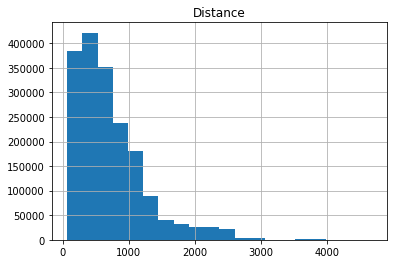

In [38]:
AA_hist = data_df[data_df["Marketing_Airline_Network"] == "AA"].hist(column="Distance", bins=20)

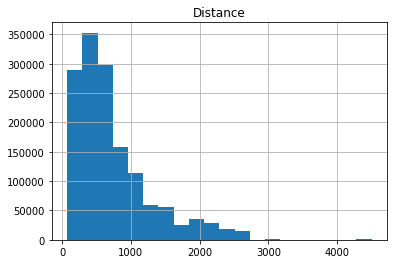

In [39]:
DL_hist = data_df[data_df["Marketing_Airline_Network"] == "DL"].hist(column="Distance", bins=20)

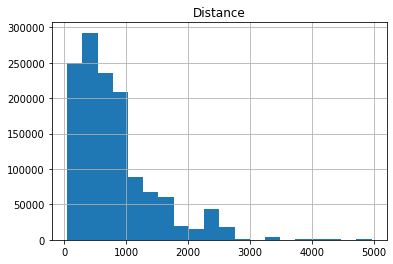

In [40]:
UA_hist = data_df[data_df["Marketing_Airline_Network"] == "UA"].hist(column="Distance", bins=20)